In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DataAnalyst.csv')

In [3]:
# Drop unnecessary column 
df.drop('Unnamed: 0', inplace=True, axis=1)


In [4]:
df.sort_values(by=['Rating'], ascending=False)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
1816,Junior Data Analyst,$50K-$86K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","Charlotte, NC","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
491,Senior Data Analyst- Secret Clearance,$49K-$112K (Glassdoor est.),Senior Data Analyst- Secret Clearance- Norfolk...,5.0,Counter Threat Solutions\n5.0,"Norfolk, VA","Reston, VA",51 to 200 employees,2015,Company - Private,Consulting,Business Services,Unknown / Non-Applicable,-1,-1
647,"Operations Analyst, Data Governance",$42K-$66K (Glassdoor est.),The Job\n\nWarner Bros. Content Technology and...,5.0,WB Technology\n5.0,"Burbank, CA","Bishnupur , India",Unknown,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1
2181,Data Analyst,$57K-$67K (Glassdoor est.),Job Description\nThe Role\nCome help our custo...,5.0,"Edison Software, Inc.\n5.0","Denver, CO","San Jose, CA",51 to 200 employees,-1,Company - Private,Computer Hardware & Software,Information Technology,$1 to $5 million (USD),-1,-1
551,Data Analyst,$37K-$70K (Glassdoor est.),We are looking for a data analyst with skills ...,5.0,Tilde Staff Inc.\n5.0,"Pasadena, CA","Pasadena, CA",1 to 50 employees,-1,Company - Private,-1,-1,Unknown / Non-Applicable,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,DATA Analyst-Remote,$99K-$178K (Glassdoor est.),"Software Guidance & Assistance, Inc., (SGA), i...",-1.0,SGA Inc.,"San Francisco, CA","Bethesda, MD",1 to 50 employees,1996,Company - Private,Architectural & Engineering Services,Business Services,$1 to $5 million (USD),-1,-1
547,Data Analyst,$37K-$70K (Glassdoor est.),Company\n\nKharon is a research and data analy...,-1.0,Kharon,"Los Angeles, CA","Los Angeles, CA",51 to 200 employees,2017,Company - Public,-1,-1,$5 to $10 million (USD),-1,-1
558,Data Analyst,$37K-$70K (Glassdoor est.),Data Analyst\n\nOnline Retailer\n\nTorrence CA...,-1.0,NextDeavor Services,"Carson, CA",-1,-1,-1,-1,-1,-1,-1,-1,-1
1120,Business / Data Analyst,$38K-$68K (Glassdoor est.),RESPONSIBILITIES Kforce has a client in search...,-1.0,Kforce Technology Staffing,"Wilmington, DE",-1,-1,-1,-1,-1,-1,-1,-1,-1


In [5]:
# Five Questions
# 1. Idea of this work is not predicting some stuff, but to analyze market and demonstrate results as its best with some bars,
# charts and e.t.c
# Five Questions
# 1. Most popular states for work
# 2. Most wanted employeers
# 3. Best fields for junior specialists
# 4. Salary correlations between fields and positions
# 5. Charts (companies with most employees, oldest companies, newest and popular companies, companies with highest salaries and rating)

### Most popular states for work

In [6]:
# We should create column called state
df['State'] = df['Location'].apply(lambda x: x.split(',')[-1].lstrip())

In [7]:
df.describe()

,Rating,Founded
count,2253.000000,2253.000000
mean,3.160630,1398.522858
std,1.665228,901.929251
min,-1.000000,-1.000000
25%,3.100000,-1.000000
50%,3.600000,1979.000000
75%,4.000000,2002.000000
max,5.000000,2019.000000


In [8]:
# After we create new column state we can group row by this column, also for our question we do not need inner data 
# so we can just count how many jobs States offer
# Size function counts enterance for our each state
# Reset_index function makes our new COUNTS column our index
states = df.groupby('State').size().reset_index(name='counts')


In [9]:
# Here is our result, so let's make it more presantable
states.sort_values(by=['counts'], inplace=True, ascending=False)

#### Pie chart

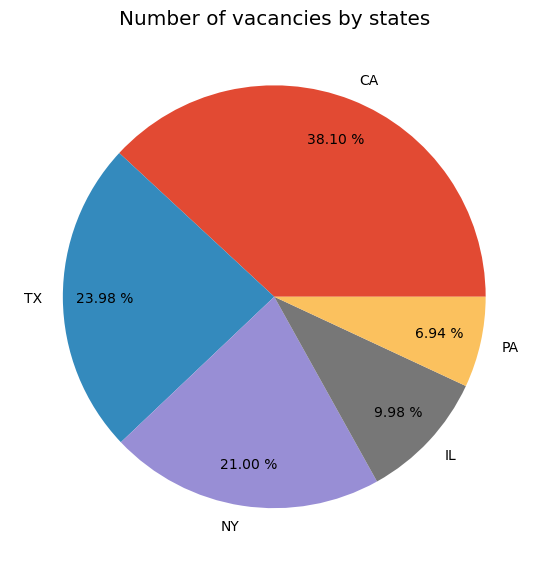

In [10]:
# For those purposes we need library called matplotlib
import matplotlib.pyplot as plt

# .figure we can give id of our plotting, size, quality and e.t.c.
plt.figure(figsize=(10,7), dpi=100)

# GGPlot is one of most popular style sheets for data visualization
plt.style.use('ggplot')

# let's plot our state dataframe
plt.title('Number of vacancies by states')

plt.pie(states['counts'][:5], labels=states['State'][:5], pctdistance=0.8, autopct='%.2f %%')

plt.show()

plt.close()

In [11]:
states

,State,counts
1,CA,626
15,TX,394
11,NY,345
6,IL,164
13,PA,114
0,AZ,97
2,CO,96
9,NC,90
10,NJ,86
18,WA,54


In [12]:
#### California is state that requires employees most

#### Most wanted employees

In [13]:
df['Sector'].replace('-1','Unknown type', inplace=True)

In [14]:
job_sectors = df.groupby('Sector').size().reset_index(name='count')

In [15]:
job_sectors

,Sector,count
0,Accounting & Legal,43
1,Aerospace & Defense,22
2,"Arts, Entertainment & Recreation",7
3,Biotech & Pharmaceuticals,33
4,Business Services,524
5,"Construction, Repair & Maintenance",16
6,Consumer Services,14
7,Education,52
8,Finance,169
9,Government,36


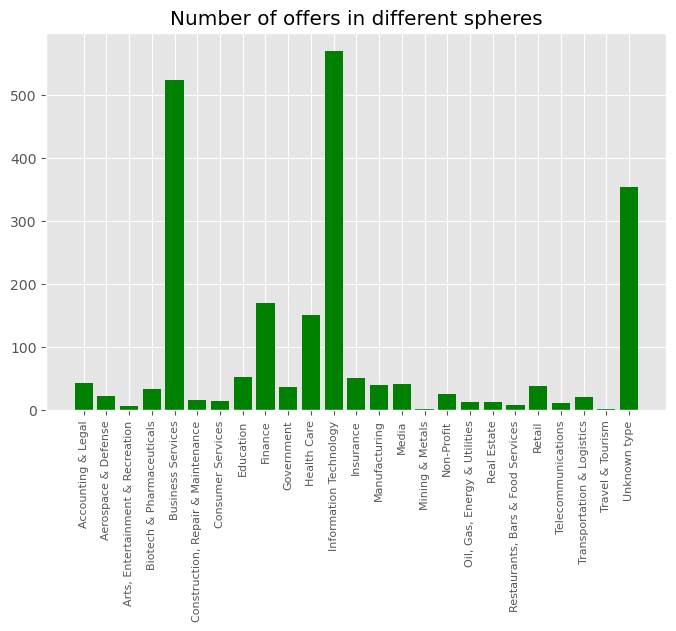

In [16]:
sectors = job_sectors['Sector']

values = job_sectors['count']


plt.figure(figsize=(8,5), dpi=100)

plt.bar(sectors, values, color='#008000')

plt.title('Number of offers in different spheres')

plt.xticks(rotation='vertical', size=8)

plt.show()

plt.close()

#### Best fields for junior specialists

In [17]:
# We want to choose job that suits best for juniors so we should have some metrics that will help to filter ads
# 1. Rating - Rating of company will help a lot to understand about companies inner spirit, so we'll take ads above or equal to 3.5
# 2. Salary - There is no surprise that everyone want to get job with high paid salary, so we will take a note about this col
# 3. Size - Depending on employee's aims we will group ads on two: big companies who hav had more than 1000 people and private companies
# Also we will group ads by states
# Info about Sector type, Revenue of company will help us too.

### Data cleaning

In [18]:
# Let's add to main dataframe min and max salary columns

# For these we should split Salary Estimate column
sal = '78𝐾− 104K (Glassdoor est.)'

sal.split('K')

['78𝐾− 104', ' (Glassdoor est.)']

In [19]:
# Add min column
df['Min'] = df['Salary Estimate'].apply(lambda x: int(x.split('K')[0].split(' ')[0][1:3]))


In [20]:
# We found out one, so replace with mean values in that sphere according to their revenue
df.loc[2149,'Salary Estimate'] = df.loc[113,'Salary Estimate']

In [21]:
# Add max column
df['Max'] = df['Salary Estimate'].apply(lambda x: int(x.split('K')[1][2:]))


In [22]:
# Check if there any exceptions
for i in range(len(df['Salary Estimate'])):
    if len(df['Salary Estimate'][i].split('K')) == 2:
        print(df['Salary Estimate'][i].split('K'),i)


### Let's start searching best offers

In [24]:
for_juniors = df[df['Job Title'].str.contains('Junior')]

In [49]:
# Here we list all ads that are looking for junior specialists
# for_juniors

In [26]:
# Rating

# Sort values by rating

# let's remove all offers form companies which rating is less than 3.5
for_juniors.sort_values(by=['Rating'], ascending=False, inplace=True)
for_juniors_rated = for_juniors[for_juniors['Rating'] >= 3.5]

<ipython-input-26-7525065f08d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_juniors.sort_values(by=['Rating'], ascending=False, inplace=True)


In [50]:
# Here we have 50 offers for junior specialists where rating of company higher than 3.5
#for_juniors_rated

In [28]:
# Salary
# Let's sort values by their salary range
for_juniors_rated.sort_values(by=['Min', 'Max'], ascending=False, inplace=True)

<ipython-input-28-36c4770a0ef6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_juniors_rated.sort_values(by=['Min', 'Max'], ascending=False, inplace=True)


In [29]:
# After sorting our data let's divide it into big and small companies
big = for_juniors_rated[for_juniors_rated['Size'].apply(lambda x: len(x.split(' ')) == 2)]
small = for_juniors_rated[for_juniors_rated['Size'].apply(lambda x: len(x.split(' ')) == 4)]

In [30]:
small

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State,Min,Max
1962,Junior Data Analyst,$93K-$159K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","San Francisco, CA","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,CA,93,159
1514,Junior Data Analyst,$89K-$151K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","San Jose, CA","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,CA,89,151
346,Data Analyst Junior,$77K-$132K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","New York, NY","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,NY,77,132
1260,Junior Data Analyst,$76K-$122K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","San Diego, CA","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,CA,76,122
759,Junior Data Analyst,$73K-$82K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","Chicago, IL","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,IL,73,82
662,Junior Data Analyst,$65K-$81K (Glassdoor est.),GENERAL SUMMARY:\n\nThe Financial & Accounting...,3.9,Tech Air\n3.9,"Long Beach, CA","Danbury, CT",201 to 500 employees,1935,Company - Private,Industrial Manufacturing,Manufacturing,$100 to $500 million (USD),-1,-1,CA,65,81
1294,Data Analyst Junior,$60K-$124K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","San Diego, CA","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,CA,60,124
734,Data Analyst (Junior),$60K-$66K (Glassdoor est.),Job Description\nTitle: Data Analyst I\n\nLoca...,4.6,Swoon\n4.6,"Downers Grove, IL","Chicago, IL",201 to 500 employees,2010,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD),-1,-1,IL,60,66
730,Junior Data Analyst,$60K-$66K (Glassdoor est.),"Job Description\nJunior Data Analyst: Chicago,...",3.7,Circle Logistics\n3.7,"Chicago, IL","Fort Wayne, IN",201 to 500 employees,2011,Company - Private,Transportation Management,Transportation & Logistics,$100 to $500 million (USD),"Redwood Logistics, Coyote Logistics, Echo Glob...",-1,IL,60,66
124,Junior Data Analyst,$59K-$85K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","New York, NY","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,NY,59,85


In [31]:
# Small companies that search junior specialists are more than big companies

### Salary Correlations between sectors

In [33]:
sector = df.groupby('Sector').mean()

In [34]:
# It is not presantable to implement all sectors salary correlation and so we decided to take 3 different sectors
# They are Information Technology; Real Estate; Arts, Entertainment & Recreation

# Min salaries
it_min = df.loc[df['Sector'] == 'Information Technology']['Min']
real_estate_min = df.loc[df['Sector'] == 'Real Estate']['Min']
art_min = df.loc[df['Sector'] == 'Arts, Entertainment & Recreation']['Min']

# Max salaries
it_max = df.loc[df['Sector'] == 'Information Technology']['Max']
real_estate_max = df.loc[df['Sector'] == 'Real Estate']['Max']
art_max = df.loc[df['Sector'] == 'Arts, Entertainment & Recreation']['Max']

#### Box and Whiskers Chart

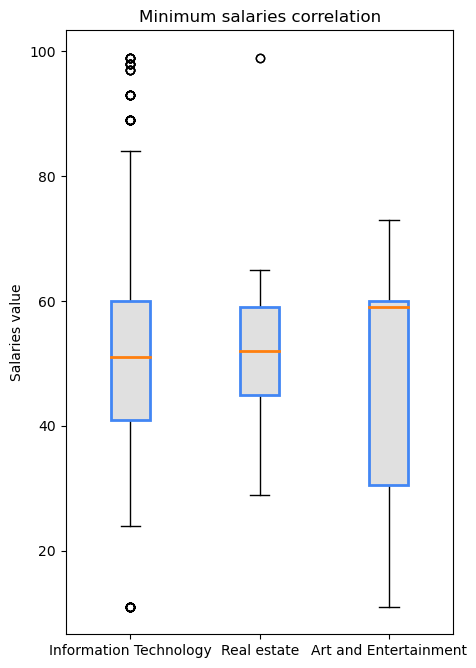

In [35]:
plt.figure(figsize=(5,8), dpi=100)

plt.style.use('default')

bp = plt.boxplot([it_min, real_estate_min, art_min], labels=['Information Technology', 'Real estate', 'Art and Entertainment'], patch_artist=True, medianprops={'linewidth': 2})

plt.title('Minimum salaries correlation')
plt.ylabel('Salaries value')

for box in bp['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color
    box.set(facecolor = '#e0e0e0' )
    # change hatch
    #box.set(hatch = '/')
    
plt.show()

plt.close()

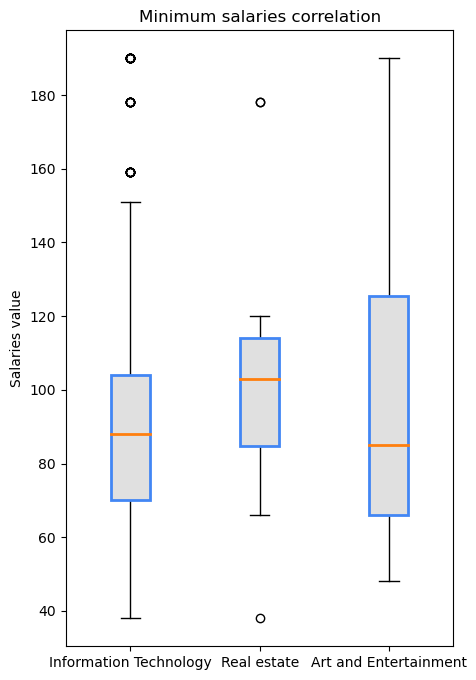

In [36]:
plt.figure(figsize=(5,8), dpi=100)

plt.style.use('default')

bp = plt.boxplot([it_max, real_estate_max, art_max], labels=['Information Technology', 'Real estate', 'Art and Entertainment'], patch_artist=True, medianprops={'linewidth': 2})

plt.title('Minimum salaries correlation')
plt.ylabel('Salaries value')

for box in bp['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color
    box.set(facecolor = '#e0e0e0' )
    # change hatch
    #box.set(hatch = '/')
    
plt.show()

plt.close()

### Charts

In [37]:
# 5. Charts (companies with most employees, oldest companies, newest and popular companies, companies with highest salaries and rating)

# Five companies with most employees
df[df['Founded'] != -1].sort_values(by=['Founded'], ascending=True)

# After sorting by year, we can see dynamic of foundation of new companies, in one period
# I want to choose the 2000 to 2019, and 1980 to 2000


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,State,Min,Max
2023,Data Systems Analyst (7199U,$65K-$120K (Glassdoor est.),and increasing private philanthropy. UDAR prov...,4.1,University of California Berkeley\n4.1,"Berkeley, CA","Berkeley, CA",10000+ employees,1682,College / University,Colleges & Universities,Education,$500 million to $1 billion (USD),-1,-1,CA,65,120
1845,Data Standardization Analyst(s),$54K-$75K (Glassdoor est.),Role Profile\n\nData Quality & Analytics is pa...,3.2,London Stock Exchange Group\n3.2,"Charlotte, NC","London, United Kingdom",1001 to 5000 employees,1698,Company - Public,Stock Exchanges,Finance,$50 to $100 million (USD),"Intercontinental Exchange, Euronext, Nasdaq",-1,NC,54,75
1123,Senior Data Analyst,$37K-$44K (Glassdoor est.),University Overview\n\nThe University of Penns...,4.3,University of Pennsylvania\n4.3,"Philadelphia, PA","Philadelphia, PA",10000+ employees,1740,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,"Harvard University, Yale University, Princeton...",-1,PA,37,44
1126,Data Analyst D,$37K-$44K (Glassdoor est.),University Overview\n\nThe University of Penns...,4.3,University of Pennsylvania\n4.3,"Philadelphia, PA","Philadelphia, PA",10000+ employees,1740,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,"Harvard University, Yale University, Princeton...",-1,PA,37,44
1105,Clinical Data Analyst,$38K-$68K (Glassdoor est.),University OverviewThe University of Pennsylva...,4.3,University of Pennsylvania\n4.3,"Philadelphia, PA","Philadelphia, PA",10000+ employees,1740,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,"Harvard University, Yale University, Princeton...",-1,PA,38,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,"Principal Data Analyst, LATAM – Disney Streami...",$60K-$110K (Glassdoor est.),"Job ID\n762918BR\n\nLocation\n\nNew York, New ...",3.6,Disney Streaming Services\n3.6,"New York, NY","New York, NY",501 to 1000 employees,2018,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,-1,NY,60,110
1835,Enterprise Data Office Analyst IV,$54K-$75K (Glassdoor est.),Specific information related to the position i...,3.5,Truist\n3.5,"Charlotte, NC","Charlotte, NC",10000+ employees,2019,Company - Public,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,NC,54,75
979,Business Data Analyst,$53K-$94K (Glassdoor est.),What We Are Looking For\n\nNEP is currently se...,4.6,National Education Partners\n4.6,"Scottsdale, AZ","Scottsdale, AZ",201 to 500 employees,2019,Company - Private,Colleges & Universities,Education,$100 to $500 million (USD),-1,-1,AZ,53,94
592,Senior Data Analyst,$57K-$103K (Glassdoor est.),OVERVIEW OF THE COMPANYFox CorporationUnder th...,4.0,Fox Corporation\n4.0,"Los Angeles, CA","New York, NY",5001 to 10000 employees,2019,Company - Public,TV Broadcast & Cable Networks,Media,Unknown / Non-Applicable,-1,-1,CA,57,103


In [51]:
yearly_grouped = df[df['Founded'] != -1].groupby('Founded').size().reset_index(name='count')



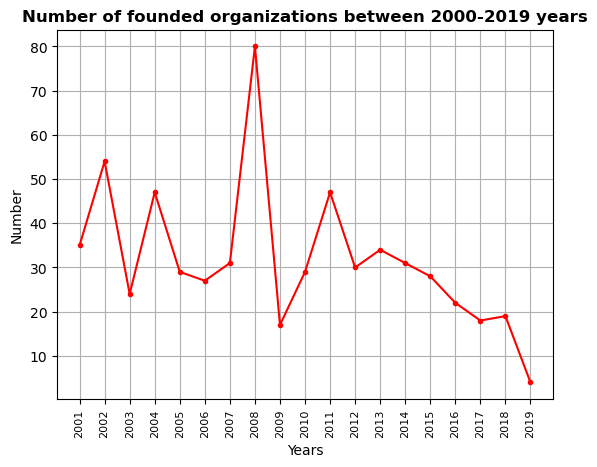

In [39]:
plt.plot(yearly_grouped[yearly_grouped['Founded']>2000]['Founded'], yearly_grouped[yearly_grouped['Founded']>2000]['count'], 'r.-')

plt.title('Number of founded organizations between 2000-2019 years', fontdict={'fontweight':'bold', 'fontsize': 12})

plt.xticks(yearly_grouped[yearly_grouped['Founded']>2000]['Founded'], rotation='vertical', size=8)

plt.xlabel('Years')
plt.ylabel('Number')

plt.grid()

plt.show()

plt.close()

In [40]:
last_twenty_number = yearly_grouped[(yearly_grouped['Founded']>=1980) & (yearly_grouped['Founded']<2000)]['count']
last_twenty_title = yearly_grouped[(yearly_grouped['Founded']>=1980) & (yearly_grouped['Founded']<2000)]['Founded']


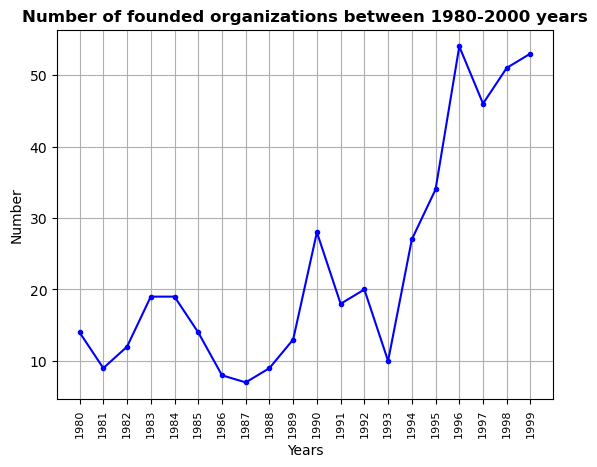

In [41]:
plt.plot(last_twenty_title, last_twenty_number, 'b.-')

plt.title('Number of founded organizations between 1980-2000 years', fontdict={'fontweight':'bold', 'fontsize': 12})

plt.xticks(last_twenty_title, rotation='vertical', size=8)

plt.xlabel('Years')
plt.ylabel('Number')

plt.grid()

plt.show()

plt.close()

### Companies with highest salaries

In [42]:
seniors = df[df['Job Title'].str.contains('Senior')]

for_juniors_rated

middle = df[(~df.isin(seniors)) & (~df.isin(for_juniors_rated))]

In [43]:
middle.dropna(inplace=True)

middle = middle.groupby('Company Name').mean()
for_juniors_rated = for_juniors_rated.groupby('Company Name').mean()
seniors = seniors.groupby('Company Name').mean()


### Top companies with highest salaries for seniors

In [52]:
seniors.sort_values(by=['Max'], ascending=False,inplace=True)

seniors

,Rating,Founded,Min,Max
Company Name,,,,
Netflix\n3.9,3.9,1997.0,11.0,190.0
Bandai Namco Entertainment America\n3.1,3.1,1990.0,11.0,190.0
Twitter\n4.0,4.0,2006.0,99.0,178.0
Chime\n4.8,4.8,2013.0,93.0,159.0
Vinsari LLC\n2.5,2.5,-1.0,93.0,159.0
...,...,...,...,...
TD Bank\n3.9,3.9,1855.0,37.0,44.0
A2C Consulting\n3.6,3.6,1994.0,37.0,44.0
Iris Plans Inc.,-1.0,-1.0,35.0,42.0


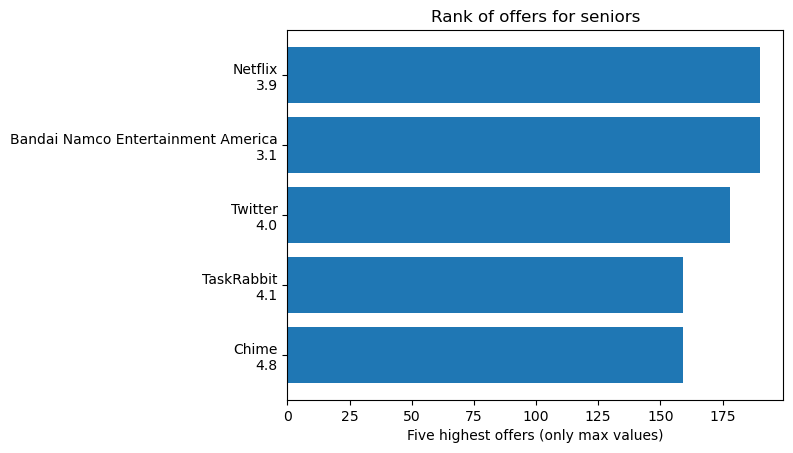

In [45]:
### Another vizualization
# Top 5 mean salaries for senior specialists
company_name = seniors[:5].index

company_values = seniors[:5]['Max']
plt.rcdefaults()

fig, ax = plt.subplots()

y_pos = np.arange(len(company_name)) 

ax.barh(y_pos, company_values, align='center')

ax.set_yticks(y_pos)
ax.set_yticklabels(company_name)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Five highest offers (only max values)')
ax.set_title('Rank of offers for seniors')

plt.show()

plt.close()

### Key words in searching for junior specialists

In [46]:
# It is harder to count all words from all along describe column, so we should 
# somehow filter words, divide the table into two by some parameter

juniors = df[df['Job Title'].str.contains('Junior')]

jun_counter = juniors['Job Description'].str.split(expand=True).stack().value_counts()

In [47]:
jun_counter['degree']

13